In [25]:
#https://windrose.readthedocs.io/en/latest/usage.html
#https://stackoverflow.com/questions/50821406/custom-scaling-of-wind-rose-python
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

import os 
import pandas as pd
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [26]:
#load CSVs
folder = '/Users/Zack/0_thesis_ocean_current_2/medsea_current_2019_csv/'
#folder = '/Users/Zack/Desktop/csv/'
files = os.listdir(folder)
print(len(files))

30


In [27]:
#sort CSV files
os.chdir(folder)
files = filter(os.path.isfile, os.listdir(folder))
files = [os.path.join(f) for f in files] 
files.sort(key=lambda x: os.path.getmtime(x))
print(len(files))

30


In [28]:
#plot function
def plot_rose(wd, ws, name):
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=.75, edgecolor='white', cmap=cm.summer) #_r)
    ax.set_yticks(np.arange(5, 25, step=5))
    ax.set_yticklabels(np.arange(5, 25, step=5))
    ax.set_legend(loc='center', bbox_to_anchor=(.5, -.1), ncol = 6, prop={'size': 12})
    #ax.set_legend(loc=3,ncol=6, mode="expand", borderaxespad=0.)
    plt.title('Farm Site ' + name[:2] + ': Ocean Current and Direction')

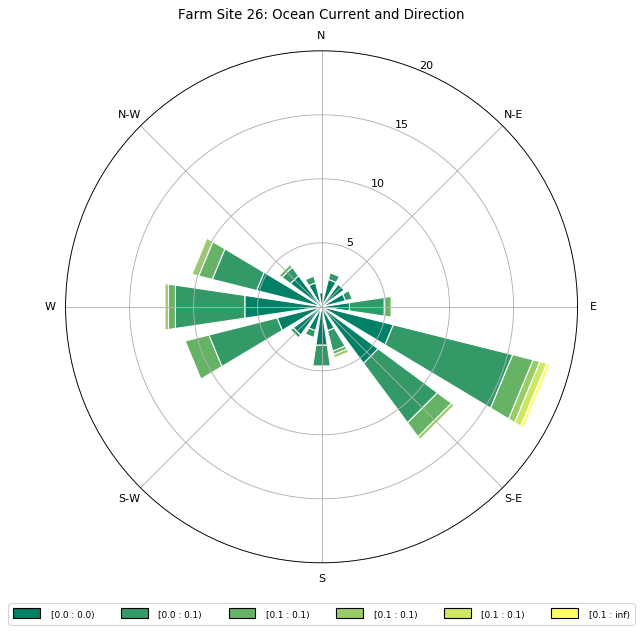

In [29]:
#plot tester
file = folder + files[1]
csv = pd.read_csv(file)
ws = csv['speed']
wd = csv['dir']
plot_rose(wd, ws, files[1])

In [30]:
out_dir = '/Users/Zack/0_thesis_ocean_current_2/plots_2019/'

for i in range(len(files)):
    file = folder + files[i]
    csv = pd.read_csv(file)
    plot_rose(wd=csv['dir'], ws=csv['speed'], name = files[i]) 
    filename = out_dir + files[i][:17] + '_plot.png'
    plot = plt.savefig(filename)
    plt.close(plot)